In [50]:
!pip install python-dotenv
!pip install boto3
!pip install mlflow

In [51]:
import boto3
import os
from dotenv import load_dotenv

load_dotenv()

# Create an S3 client
s3 = boto3.client('s3')

try:
    from google.colab import userdata

    region_name = userdata.get('region')
    aws_access_key_id = userdata.get('aws_access_key_id')
    aws_secret_access_key = userdata.get('aws_secret_access_key')
    bucket_name = userdata.get('bucket_name')
    object_key = userdata.get('object_key')
    print("Running on CoLab")

except:

    region_name = os.getenv('region')
    aws_access_key_id = os.getenv('aws_access_key_id')
    aws_secret_access_key = os.getenv('aws_secret_access_key')
    bucket_name = os.getenv('bucket_name')
    object_key = os.getenv('object_key')
    print("Not running on CoLab")


my_session = boto3.session.Session(
    region_name=region_name,
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
)

# Define your bucket and object key
bucket_name = bucket_name
object_key = object_key

try:
    # Get the object from S3 using the session's client
    s3_client = my_session.client('s3')
    response = s3_client.get_object(Bucket=bucket_name, Key=object_key)

    # # Read and decode the content
    file_content = response['Body'].read().decode('utf-8')

    print("Response success")

except Exception as e:
    print(f"Error retrieving object: {e}")

Not running on CoLab
Response success


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(type(file_content))

<class 'str'>


In [53]:
import pandas as pd
import io

# Use io.StringIO to read the string content as a file
df = pd.read_csv(io.StringIO(file_content))

# Display the first 5 rows of the DataFrame
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Preprocessing of the Data


In [54]:
print("Data types of all columns:")
df.info()

print("\nDescriptive statistics for numerical columns:")
df.describe()

Data types of all columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [55]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [56]:
# Need to find the percentage of the data that is missing
df.isnull().sum() / len(df)

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### So If I delete the missign values, I will be deleting 20% of the data.

For now, let's delete the missing values. If we need more data, we can use imputation.


In [57]:
df_clean = df.dropna()

In [58]:
df_clean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Viualize the price distribution


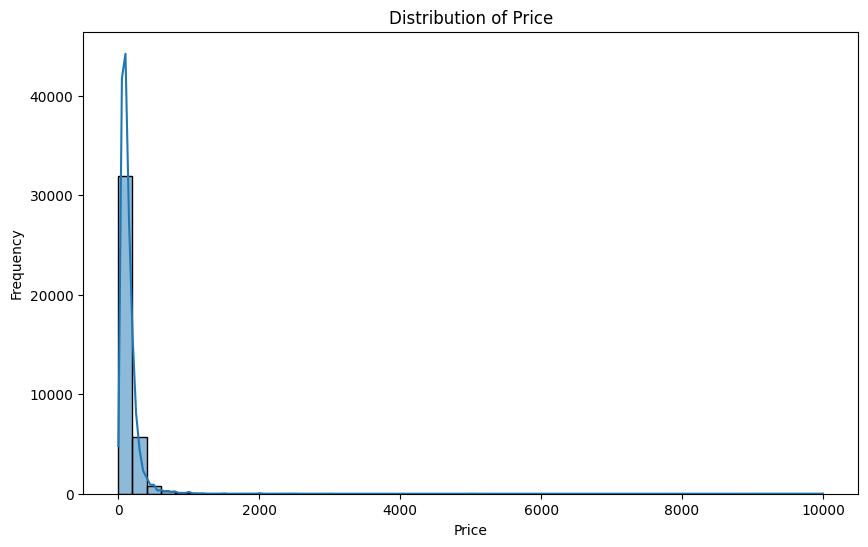

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

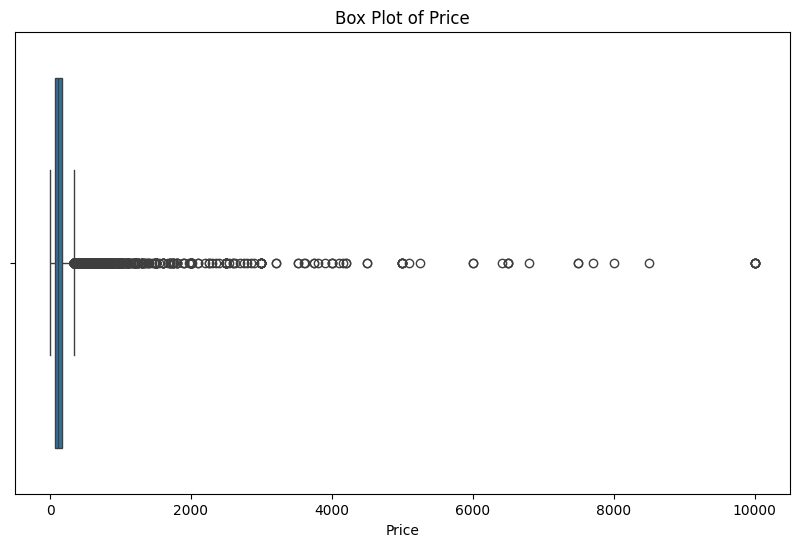

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

### We have a lot of outliers in the data, I will be working on the 99 percentile of the data


In [61]:
price_99th_percentile = df_clean['price'].quantile(0.99)
df_clean['price'] = np.where(
    df_clean['price'] > price_99th_percentile, price_99th_percentile, df_clean['price'])

print(f"99th percentile of price: {price_99th_percentile}")
print("\nDescriptive statistics of price after capping outliers:")
display(df_clean['price'].describe())

99th percentile of price: 671.6000000000058

Descriptive statistics of price after capping outliers:


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_42166/2191562581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = np.where(


count    38821.000000
mean       136.269117
std        105.641191
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max        671.600000
Name: price, dtype: float64

## Same Visualization on the 99 percentile data


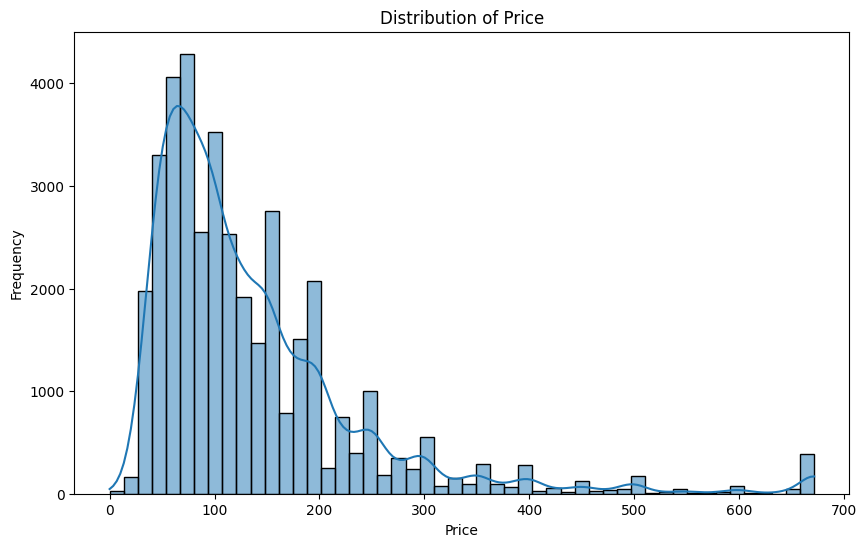

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

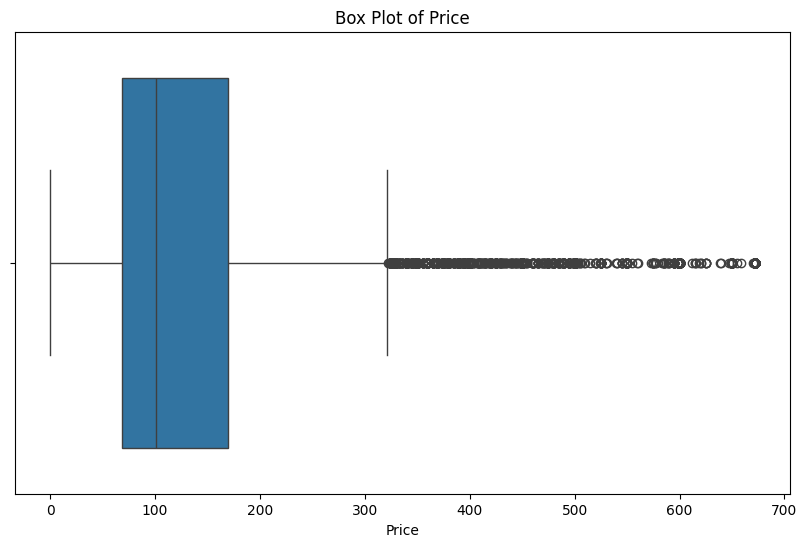

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

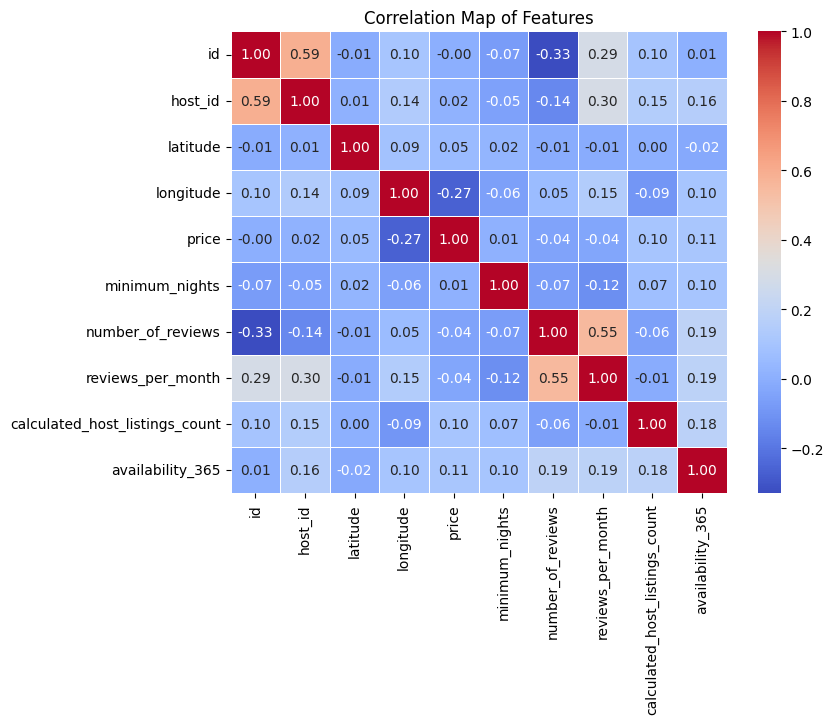

In [64]:
import numpy as np

correlation_matrix = df_clean.select_dtypes(include=np.number).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map of Features')
plt.show()

In [65]:
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review']
df_clean.drop(columns=columns_to_drop, axis=1, inplace=True)
print("Columns dropped successfully. Displaying the first 5 rows of the modified DataFrame:")
display(df_clean.head())

Columns dropped successfully. Displaying the first 5 rows of the modified DataFrame:


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_42166/1174583003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=columns_to_drop, axis=1, inplace=True)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129


In [66]:
df_clean['log_number_of_reviews'] = np.log1p(df_clean['number_of_reviews'])
df_clean['log_minimum_nights'] = np.log1p(df_clean['minimum_nights'])

print("DataFrame with new log-transformed columns:")
display(df_clean.head())

print("\nDescriptive statistics for log_number_of_reviews:")
display(df_clean['log_number_of_reviews'].describe())

print("\nDescriptive statistics for log_minimum_nights:")
display(df_clean['log_minimum_nights'].describe())

DataFrame with new log-transformed columns:


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_42166/766867079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_number_of_reviews'] = np.log1p(df_clean['number_of_reviews'])
/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_42166/766867079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_minimum_nights'] = np.log1p(df_clean['minimum_nights'])


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_number_of_reviews,log_minimum_nights
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365,2.302585,0.693147
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,3.828641,0.693147
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194,5.602119,0.693147
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0,2.302585,2.397895
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129,4.317488,1.386294



Descriptive statistics for log_number_of_reviews:


count    38821.000000
mean         2.505835
std          1.337275
min          0.693147
25%          1.386294
50%          2.302585
75%          3.526361
max          6.445720
Name: log_number_of_reviews, dtype: float64


Descriptive statistics for log_minimum_nights:


count    38821.000000
mean         1.428149
std          0.787856
min          0.693147
25%          0.693147
50%          1.098612
75%          1.609438
max          7.131699
Name: log_minimum_nights, dtype: float64

## Encoding Categorical Features

Identify all categorical features in the DataFrame (e.g., 'neighbourhood_group', 'room_type') and apply suitable encoding techniques, such as One-Hot Encoding, to convert them into a numerical format for machine learning models.


In [67]:
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
df_encoded = pd.get_dummies(df_clean[categorical_cols], drop_first=True)

df_clean = pd.concat([df_clean, df_encoded], axis=1)
df_clean.drop(columns=categorical_cols, inplace=True)

print("DataFrame after one-hot encoding categorical features:")
display(df_clean.head())

DataFrame after one-hot encoding categorical features:


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_number_of_reviews,log_minimum_nights,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149.0,1,9,0.21,6,365,2.302585,0.693147,...,False,False,False,False,False,False,False,False,True,False
1,40.75362,-73.98377,225.0,1,45,0.38,2,355,3.828641,0.693147,...,False,False,False,False,False,False,False,False,False,False
3,40.68514,-73.95976,89.0,1,270,4.64,1,194,5.602119,0.693147,...,False,False,False,False,False,False,False,False,False,False
4,40.79851,-73.94399,80.0,10,9,0.10,1,0,2.302585,2.397895,...,False,False,False,False,False,False,False,False,False,False
5,40.74767,-73.97500,200.0,3,74,0.59,1,129,4.317488,1.386294,...,False,False,False,False,False,False,False,False,False,False


## Split Data into Training and Testing Sets


In [68]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (38821, 232)
Shape of target (y): (38821,)


In [69]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target variable (y)
X = df_clean.drop('price', axis=1)
y = df_clean['price']

# 2. Split into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Split the temporary set into validation (50%) and test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Print the shapes of the resulting DataFrames/Series
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (31056, 232)
Shape of y_train: (31056,)
Shape of X_val: (3882, 232)
Shape of y_val: (3882,)
Shape of X_test: (3883, 232)
Shape of y_test: (3883,)


## Model Training and Evaluation


### Liner Regression


In [70]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

print("Libraries imported successfully.")

Libraries imported successfully.


In [71]:
mlflow.set_experiment('Airbnb Price Prediction')


def train_evaluate_log_model(model, model_name, params, X_train, y_train, X_val, y_val):
    with mlflow.start_run(run_name=model_name):
        # Log parameters
        mlflow.log_params(params)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Log metrics
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        # Log the model with an input example to avoid warnings
        mlflow.sklearn.log_model(
            sk_model=model,
            # Changed artifact_path to name
            name=model_name.replace(' ', '_').lower() + '_model',
            # Using a sample from X_train as input_example
            input_example=X_train.head(1)
        )

        print(f"--- {model_name} Results ---")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R2 Score: {r2:.4f}")

        return {"Model": model_name, "RMSE": rmse, "MAE": mae, "R2 Score": r2}


print("MLflow experiment set and helper function 'train_evaluate_log_model' updated with input_example and 'name' parameter.")

MLflow experiment set and helper function 'train_evaluate_log_model' updated with input_example and 'name' parameter.


In [72]:
model_performance_list = []

# Linear Regression
lr_model = LinearRegression(fit_intercept=True)
lr_params = lr_model.get_params()
lr_results = train_evaluate_log_model(
    lr_model, "Linear Regression", lr_params, X_train, y_train, X_val, y_val)
model_performance_list.append(lr_results)

# Random Forest Regressor
rf_model = RandomForestRegressor(
    random_state=42, n_estimators=100, max_depth=10)
rf_params = rf_model.get_params()
rf_results = train_evaluate_log_model(
    rf_model, "Random Forest", rf_params, X_train, y_train, X_val, y_val)
model_performance_list.append(rf_results)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbr_params = gbr_model.get_params()
gbr_results = train_evaluate_log_model(
    gbr_model, "Gradient Boosting Regressor", gbr_params, X_train, y_train, X_val, y_val)
model_performance_list.append(gbr_results)

# Convert results to DataFrame
model_performance_df = pd.DataFrame(model_performance_list)

print("\n--- Model Performance Summary ---")
display(model_performance_df)

/Users/dhruv/code/Machine Learning/Projects/airbnb-price-prediction-mlflow/.venv/lib/python3.14/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


--- Linear Regression Results ---
RMSE: 84.4409
MAE: 51.3292
R2 Score: 0.3974


/Users/dhruv/code/Machine Learning/Projects/airbnb-price-prediction-mlflow/.venv/lib/python3.14/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


--- Random Forest Results ---
RMSE: 78.8162
MAE: 46.6270
R2 Score: 0.4750


/Users/dhruv/code/Machine Learning/Projects/airbnb-price-prediction-mlflow/.venv/lib/python3.14/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


--- Gradient Boosting Regressor Results ---
RMSE: 80.0414
MAE: 47.7906
R2 Score: 0.4585

--- Model Performance Summary ---


,Model,RMSE,MAE,R2 Score
0,Linear Regression,84.440877,51.329176,0.397377
1,Random Forest,78.816241,46.627024,0.474985
2,Gradient Boosting Regressor,80.041383,47.790642,0.458536
